# Metropolis-Hastings Sampling

본 코드는 Metropolis-Hastings Sampling의 구현 예시입니다.    
본 코드를 통하여, Metropolis-Hastings Sampling의 이론과 구현 과정을 배울 수 있으며, random walk M-H Sampling를 활용하여 알고리즘의 결과를 알아 볼 수 있습니다.  

Metropolis-Hastings 알고리즘은 MCMC(Markov Chain Monte Carlo)에서 Stationary probability π만 주어졌을 경우, 주어진 π에 맞는 transition matrix를 구하는 알고리즘입니다.  

먼저 M-H 알고리즘이 MCMC에서 작동하는 부분을 알기 위해서는 MCMC의 일반적인 알고리즘을 우선적으로 살펴봐야합니다. 먼저 잠재 변수에 대한 현재의 값이 $z_t$로 주어져 있다면 다음 시점에서의 값의 후보 $z_*$를 기존의 정보를 이용해서 생성합니다. 이때 $z_*$는 Proposal distribution이라 부르는 $q(z_* \mid z_t$)을 통해 생성됩니다. 이렇게 생성된 $z_*$는 바로 실제 다음 시점에서의 값 $z_{t+1}$이 되는 것이 아니라 해당 후보를 실제 $z_{t+1}$로 받아들일 것인지 검증하는 과정을 거치게 됩니다. 이 과정은 Acceptance probability $\alpha$을 통해 $\alpha$의 확률로 해당 후보를 $z_{t+1}$로 Accept ($z_{t+1}=z_*$)하거나 1-$\alpha$의 확률로 reject ($z_{t+1}=z_t$)합니다. 위의 과정을 반복하는 것이 MCMC의 일반적인 알고리즘입니다.

M-H 알고리즘은 앞서 언급한 것 과 마찬가지로 Stationary probability π만 주어졌을 경우, 주어진 π에 맞는 transition matrix를 구하는 알고리즘입니다.  
우리에게 주어진 것은 잠재 변수의 확률 밀도 함수 P와 임의로 정할 수 있는 Proposal distribution q가 있습니다. 초기에 언급했듯이 MCMC는 stationary probability π로부터 알맞은 transition matrix를 찾기 위해 역으로 계산하는 과정입니다. 이는 MCMC의 결과로부터 다시 같은 stationary probability π를 도출할 수 있어야하고 이를 가능하게 하는 것은 Reversible Markov Chain입니다. 이러한 이유로 임의로 정할 수 있는 q가 Balance equation을 만족하는지 확인해야합니다. 이는 $q(z_t\mid z_*)P(z_*)$와 $q(z_* \mid z_t)P(z_t)$가 같은지 확인하는 것과 같고 이를 확인하는 지표로써 r을 아래와 같이 정의합니다.

$$r(z_* \mid z_t)= \frac{q(z_t \mid z_*)P(z_*)}{q(z_* \mid z_t)P(z_t)}$$
$$q(z_t \mid z_*)P(z_*)r_{z_* \rightarrow z_t}=q(z_* \mid z_t)P(z_t)r_{z_t \rightarrow z_*}$$

우리는 $r(z_* \mid z_t)$이 1에 가까워져서 Reversible Markov chain에 가까워지는 것을 궁극적인 목표로 하고 있습니다. 따라서 만약 $r(z_* \mid z_t)$이 1이 아닐 경우 1에 가까워지도록 q를 조정하는 과정이 필요합니다. 

만약 $r(z_* \mid z_t)>1$이면, $q(z_t \mid z_*)P(z_*)>q(z_* \mid z_t)P(z_t)$이므로 $q(z_t \mid z_*)$는 줄이고 $q(z_* \mid z_t)$는 키우는 방향으로 조정이 이루어져야합니다. 이를 위해서는 $r_{z_* \rightarrow z_t}$는 $r(z_t \mid z_*)$로  $r_{z_t \rightarrow z_*}$는 1로 조정합니다. 

만약 $r(z_* \mid z_t)<1$이면, $q(z_t \mid z_*)P(z_*)<q(z_* \mid z_t)P(z_t)$이므로 $q(z_t \mid z_*)$는 키우고 $q(z_* \mid z_t)$는 줄이는 방향으로 조정이 이루어져야합니다. 이를 위해서는 $r_{z_* \rightarrow z_t}$는 1로  $r_{z_t \rightarrow z_*}$는 $r(z_* \mid z_t)$로 조정합니다. 
현재 $z_t$에서 $z_*$로 이동하는 transtiion을 고려하므로, Acceptance probability $\alpha$는 $min(1,r(z_* \mid z_t))$가 됩니다.  

본 코드는 M-H Algorithm 중 하나인 random walk M-H Algorithm을 이용하여 구현하였습니다.  
random walk M-H Algorithm은 후보 $z_*$가 $z_t+\epsilon$ 형태로 이루어져있다고 가정하며, $\epsilon$은 i.i.d symmetric distribution을 따릅니다.  
일반적으로 $\epsilon \sim N(0,\sigma^2)$으로 가정하며, 이에 따라 후보는 $z_* \sim N(z_t,\sigma^2)$를 따르게 됩니다.  
Random walk M-H Algorithm은 기존의 M-H Algorithm과 유사하며 아래와 같은 과정으로 진행됩니다.  

초기값 $z_0$설정  
for i=1,2,3....N  
    $\epsilon$ 생성  
후보 $z_*=z_t+\epsilon$  
    $u \sim U[0,1]$ 생성  
    if u $\le \alpha$   
        >>$z_{t+1}=z_*$  (Accept z_*)  
    else  
        >>$z_{t+1}=z_t$  (Reject z_*)  
    결정된 $z_{t+1}$ 저장
    
end


In [12]:
'''
@ copyright: AAI lab (http://aailab.kaist.ac.kr/xe2/page_GBex27)
@ author: Moon Il-chul: icmoon@kaist.ac.kr
@ annotated by Shin Dong-Hyeok: tlsehdgur0@kaist.ac.kr
'''
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

%matplotlib inline  

## Forward Sampling

In [13]:
# Gaussian Mixture distribution의 Hyper paramter의 true value 부여
pi_true = np.array([0.35, 0.45, 0.2]) # Hyperparameter π의 실제 값
mu_true = np.array([-2,1,5])  # Hyperparameter μ의 실제 값
sigma_true = np.array([0.9, 0.3, .7])  # Hyperparameter Σ의 실제 값

N = 30000 # N : 전체 샘플의 갯수 
obs = np.zeros(N) # obs : N개의 샘플, X의 값을 저장

for i in range(N):
    # z에 대한 샘플링 과정
    z = np.random.random_sample() # [0.0, 1.0)에서 임의의 실수를 선택 
    idx = 0
    tempSum = 0
    
    # z가 속한 범위에 따라 Hyperparameter의 index를 결정하는 과정
    # ex) (0,0.35] -> 0 , (0.35,0.8] -> 1, (0.8,1] -> 2
    for j in range(np.size(pi_true)):
        if ((z > tempSum) & (z<=tempSum+pi_true[j])):
            idx = j
            break
        else:
            tempSum = tempSum + pi_true[j]
    
    # X에 대한 샘플링 과정
    # 샘플링한 z의 값에 대응하는 μ,Σ를 갖는 다변수 가우스 분포에서 X를 샘플링
    v_temp = np.random.normal(mu_true[idx], sigma_true[idx], 1)
    obs[i] = v_temp;

C:\Users\Dong-Hyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


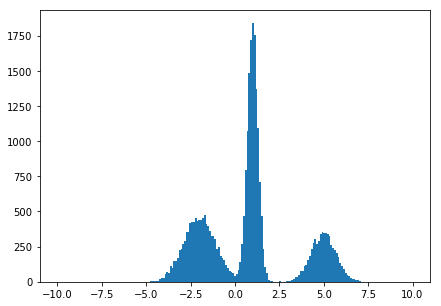

In [14]:
plt.figure(1, figsize=(7,5))
plt.hist(obs, bins=np.linspace(-10,10,(10-(-10))/0.1))
plt.show()

## M-H Sampling

In [15]:
sigma_assumed = 40 # sigma_assumed : proposal distribution q의 standard deviation 
sample = np.zeros(N)
idx = np.zeros(N)
idx = idx.astype(int)
sample[0] = 0
idx[0] = 1

for i in range(1,N): # 전체 sample 갯수만큼 반복 
    idx[i] = np.random.random_integers(3)-1
    sample[i] = np.random.normal(sample[i],sigma_assumed, 1) # z_i를 sampling
    p_t = pi_true[idx[i]] * multivariate_normal.pdf(sample[i], mu_true[idx[i]], sigma_true[idx[i]]) # P(z_i)
    q_t = multivariate_normal.pdf(sample[i], sample[i-1], sigma_assumed) # q(z_i l z_{i-1})
    p_t_1 = pi_true[idx[i-1]] * multivariate_normal.pdf(sample[i-1], mu_true[idx[i-1]], sigma_true[idx[i-1]]) # P(z_{i-1})
    q_t_1 = multivariate_normal.pdf(sample[i-1], sample[i], sigma_assumed) # q(z_{i-1} l z_i)
    
    # Acceptance probability를 결정하는 과정
    # alpha = min(1, r)
    alpha = (p_t * q_t) / (p_t_1 * q_t_1)
    if alpha > 1: # alpha = min(1,r) = 1     if r > 1
        alpha = 1
    
    # Acceptance probability를 이용하여 z_*를 z_{t+1}로 accept/reject 여부를 판별 
    u = np.random.uniform(0,1,1)[0] # [0,1]에서 임의로 실수를 선택하여 구간에 따라 여부 판별
    if u >= alpha: # u가 alpha보다 클 확률 = 1 - alpha  => reject & z_{t+1}=z_t 
        sample[i] = sample[i-1]
        idx[i] = idx[i-1]


C:\Users\Dong-Hyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  if __name__ == '__main__':


C:\Users\Dong-Hyeok\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


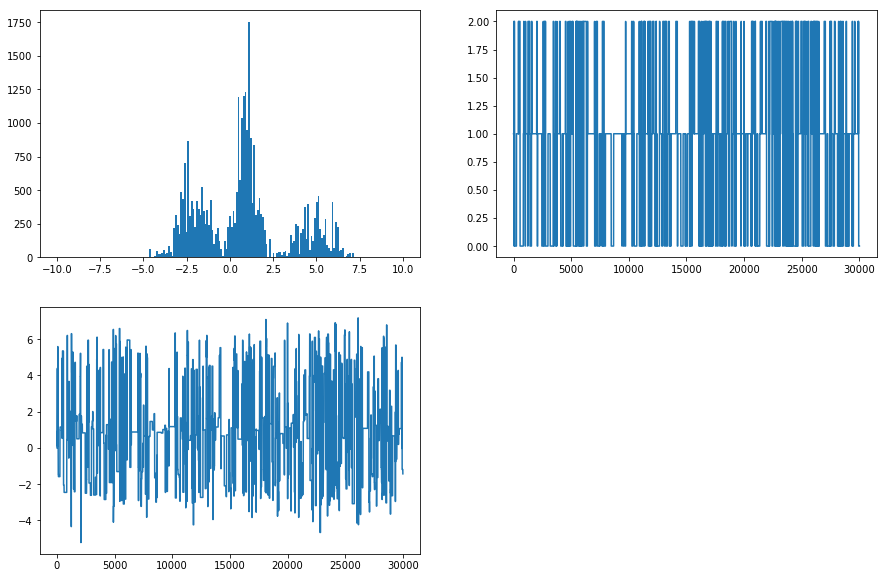

In [16]:
plt.figure(1, figsize=(15,10))
plt.subplot(2, 2, 1)
plt.hist(sample, bins=np.linspace(-10,10,(10-(-10))/0.1))

plt.subplot(2, 2, 2)
plt.plot(np.arange(N), idx)

plt.subplot(2, 2, 3)
plt.plot(np.arange(N), sample)
plt.show()

## 결과 해석부

첫 번째 그래프는 M-H Sampling을 통한 전반적인 mixture distribution을 히스토그램으로 나타낸 그래프입니다.  
두 번째 그래프는 잠재 변수 z에 대한 M-H Sampling의 결과이며 세 번째 그래프는 관찰 변수 x에 대한 M-H Sampling의 결과입니다.  

Random walk의 폭은 $\sigma^2$에 의해서 결정되고 현재 $\sigma^2=40$으로 큰 값을 가지므로, 이동이 매우 자주 일어남을 확인할 수 있습니다.  
또한 $\sigma^2$가 큰 값을 가지므로 Mixture distribution의 세 봉우리 모두를 잘 샘플링함을 확인할 수 있습니다.   